Ashley Brown 801055033 10/25/2022

Homework 3

'In this homework, we will use the cancer dataset. (Note: You can use the built-in function from ML libraries for gradient descent, training, and validation.) Also, sample code for accessing and cleaning up the dataset provided in Canvas. For the evaluation of this homework across all problems, use 80%, 20% split."

In [1]:
#imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

Problem 1 (40pts):

Use the cancer dataset to build a Naïve Bayesian model to classify the type of cancer (Malignant vs. benign). Plot your classification accuracy, precision, and recall. Explain and elaborate on your results. Can you compare your results against the logistic regression classifier you did in previous homework.

In [2]:
#from homework 2 and naive bayes classifier example:
#load dataset
breast = load_breast_cancer() 
breast_data = breast.data 
breast_input = pd.DataFrame(breast_data)

X = breast_data
Y = breast.target

#standardize data before splitting
scaler = StandardScaler()
X = scaler.fit_transform(X)

#split dataset
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, train_size = 0.8, test_size = 0.2)

#perform naive bayes training (can use built in functions)
classifier = GaussianNB()
classifier.fit(xTrain, yTrain)

#prediction function
yPred = classifier.predict(xTest)

#get confusion matrix values
cmatrix = confusion_matrix(yTest, yPred)

#print metrics etc.
print("accuracy =",metrics.accuracy_score(yTest, yPred)) 
print("precision =",metrics.precision_score(yTest, yPred)) 
print("recall = ",metrics.recall_score(yTest, yPred)) 
print("classification report: \n",metrics.classification_report(yTest, yPred)) 
print("confusion matrix: \n",metrics.confusion_matrix(yTest, yPred))

accuracy = 0.9385964912280702
precision = 0.9382716049382716
recall =  0.9743589743589743
classification report: 
               precision    recall  f1-score   support

           0       0.94      0.86      0.90        36
           1       0.94      0.97      0.96        78

    accuracy                           0.94       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

confusion matrix: 
 [[31  5]
 [ 2 76]]


Text(0.5, 257.44, 'predicted')

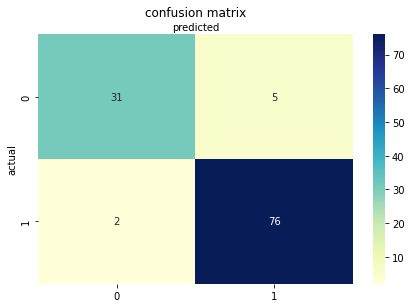

In [3]:
#generate heatmap plot of confusion matrix
class_names=[0,1]
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cmatrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('confusion matrix', y=1) 
plt.ylabel('actual') 
plt.xlabel('predicted') 

Problem 2 (40pts):

Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest classification accuracy. Plot your classification accuracy, precision, and recall over a different number of Ks. Explain and elaborate on your results.

In [4]:
#have to put cancer data into a data frame
#https://stackoverflow.com/questions/44340445/loading-sklearn-cancer-dataset-into-pandas-dataframe
breast = load_breast_cancer()
#df = pd.DataFrame(np.c_[breast['data'], breast['target']], columns= np.append(breast['feature_names'], ['target']))
#df = pd.DataFrame(data=breast.data, columns=breast.feature_names)

#load dataset
breast = load_breast_cancer() 
breast_data = breast.data 
breast_input = pd.DataFrame(breast_data)

X = breast_data
Y = breast.target

#print(df.shape)
#df.head(5)

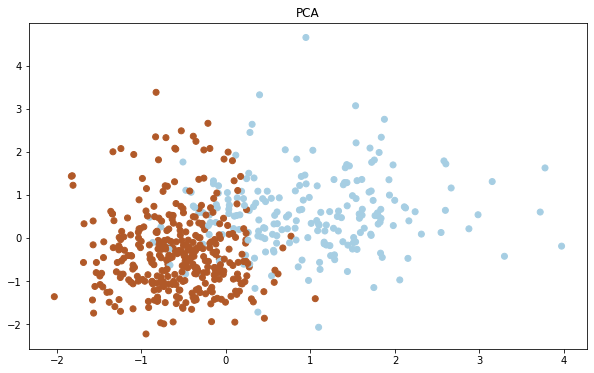

In [5]:
#standardize data before splitting
scaler = StandardScaler()
X = scaler.fit_transform(X)

#old training (for just one value of n):

#perform PCA
pca = PCA(n_components=2)
pcaX = pca.fit_transform(X)

#plot that can show PCA split:
plt.figure(figsize=(10,6))
plt.title("PCA")
plt.scatter(X[:,0], X[:,1], c=Y, cmap='Paired')

In [6]:
#storage variables:
accuracy = []
precision = []
recall = []
avg = 0

#big loop
for k in range(1, 31):
  #perform PCA
  pca = PCA(n_components=k)
  pcaX = pca.fit_transform(X)

  #split dataset using pca X
  xTrain, xTest, yTrain, yTest = train_test_split(pcaX, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

  #perform log reg training on PCA data
  classifier = LogisticRegression(random_state = 0)
  classifier.fit(xTrain, yTrain)

  #prediction function
  yPred = classifier.predict(xTest)

  #get confusion matrix values
  cmatrix = confusion_matrix(yTest, yPred)

  #store values in array.
  accuracyTemp = metrics.accuracy_score(yTest, yPred)
  precisionTemp = metrics.precision_score(yTest, yPred) 
  recallTemp = metrics.recall_score(yTest, yPred) 

  accuracy.append(accuracyTemp)
  precision.append(precisionTemp)
  recall.append(recallTemp)

  #if best accuracy/precision/recall values so far, store index
  new = (accuracyTemp + precisionTemp + recallTemp)/3
  if avg < new:
    avg = new
    index = k

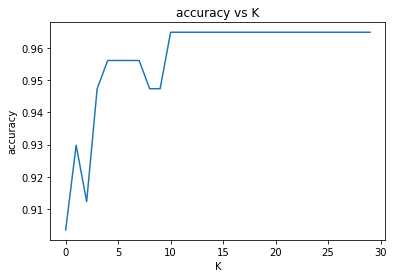

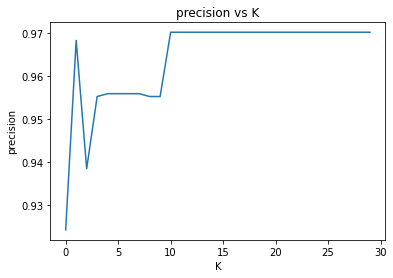

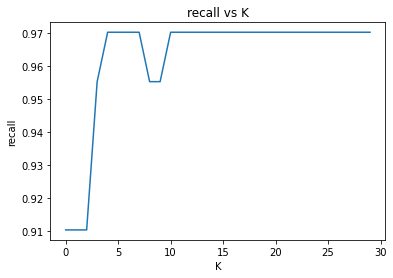

In [7]:
#plot final values
plt.plot(accuracy)
plt.xlabel('K')
plt.ylabel('accuracy')
plt.title('accuracy vs K')
plt.show()

plt.plot(precision)
plt.xlabel('K')
plt.ylabel('precision')
plt.title('precision vs K')
plt.show()

plt.plot(recall)
plt.xlabel('K')
plt.ylabel('recall')
plt.title('recall vs K')
plt.show()

On the graph, you can visually see some peaks. The highest peak was stored and the training is performed in the code below:

In [8]:
#highest k value:
#perform PCA
pca = PCA(n_components=index)
pcaX = pca.fit_transform(X)

#split dataset using pca X
xTrain, xTest, yTrain, yTest = train_test_split(pcaX, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

#train using same model as before
classifier.fit(xTrain, yTrain)

#prediction function
yPred = classifier.predict(xTest)

#get confusion matrix values
cmatrix = confusion_matrix(yTest, yPred)

#print metrics etc.
print("This is the model with the highest average accuracy/precision/recall:")
print("K =",k)
print("accuracy =",metrics.accuracy_score(yTest, yPred)) 
print("precision =",metrics.precision_score(yTest, yPred)) 
print("recall = ",metrics.recall_score(yTest, yPred)) 
print("classification report: \n",metrics.classification_report(yTest, yPred)) 
print("confusion matrix: \n",metrics.confusion_matrix(yTest, yPred))

This is the model with the highest average accuracy/precision/recall:
K = 30
accuracy = 0.9649122807017544
precision = 0.9701492537313433
recall =  0.9701492537313433
classification report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

confusion matrix: 
 [[45  2]
 [ 2 65]]



Problem 3 (20pts):

Can you repeat problem 2? This time, replace logistic regression with the Bayes classifier. Report your results (classification accuracy, precision, and recall). Compare your results against problem 2.

In [9]:
#standardize data before splitting
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
#storage variables:
accuracy = []
precision = []
recall = []
avg = 0

#big loop
for k in range(1, 31):
  #perform PCA
  pca = PCA(n_components=k)
  pcaX = pca.fit_transform(X)

  #split dataset using pca X
  xTrain, xTest, yTrain, yTest = train_test_split(pcaX, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

  #perform log reg training on PCA data
  classifier = GaussianNB()
  classifier.fit(xTrain, yTrain)

  #prediction function
  yPred = classifier.predict(xTest)

  #get confusion matrix values
  cmatrix = confusion_matrix(yTest, yPred)

  #store values in array.
  accuracyTemp = metrics.accuracy_score(yTest, yPred)
  precisionTemp = metrics.precision_score(yTest, yPred) 
  recallTemp = metrics.recall_score(yTest, yPred) 

  accuracy.append(accuracyTemp)
  precision.append(precisionTemp)
  recall.append(recallTemp)

  #if best accuracy/precision/recall values so far, store index
  new = (accuracyTemp + precisionTemp + recallTemp)/3
  if avg < new:
    avg = new
    index = k

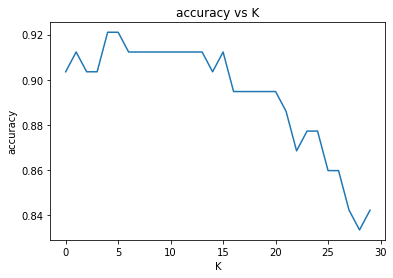

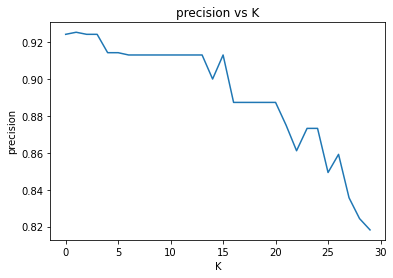

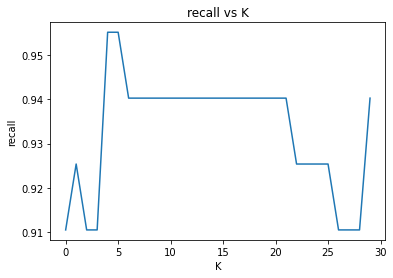

In [11]:
#plot final values
plt.plot(accuracy)
plt.xlabel('K')
plt.ylabel('accuracy')
plt.title('accuracy vs K')
plt.show()

plt.plot(precision)
plt.xlabel('K')
plt.ylabel('precision')
plt.title('precision vs K')
plt.show()

plt.plot(recall)
plt.xlabel('K')
plt.ylabel('recall')
plt.title('recall vs K')
plt.show()

On the graph, you can visually see some peaks. The highest peak was stored and the training is performed in the code below:

In [12]:
#highest k value:
#perform PCA
pca = PCA(n_components=index)
pcaX = pca.fit_transform(X)

#split dataset using pca X
xTrain, xTest, yTrain, yTest = train_test_split(pcaX, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

#train using same model as before
classifier.fit(xTrain, yTrain)

#prediction function
yPred = classifier.predict(xTest)

#get confusion matrix values
cmatrix = confusion_matrix(yTest, yPred)

#print metrics etc.
print("This is the model with the highest average accuracy/precision/recall:")
print("K =",k)
print("accuracy =",metrics.accuracy_score(yTest, yPred)) 
print("precision =",metrics.precision_score(yTest, yPred)) 
print("recall = ",metrics.recall_score(yTest, yPred)) 
print("classification report: \n",metrics.classification_report(yTest, yPred)) 
print("confusion matrix: \n",metrics.confusion_matrix(yTest, yPred))

This is the model with the highest average accuracy/precision/recall:
K = 30
accuracy = 0.9210526315789473
precision = 0.9142857142857143
recall =  0.9552238805970149
classification report: 
               precision    recall  f1-score   support

           0       0.93      0.87      0.90        47
           1       0.91      0.96      0.93        67

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114

confusion matrix: 
 [[41  6]
 [ 3 64]]
